<a href="https://colab.research.google.com/github/Classymotion/Smilegate/blob/main/bayesian_with_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 23.9 MB/s eta 0:00:00


Sample: 100%|██████████| 1200/1200 [00:11, 100.05it/s, step size=1.10e+00, acc. prob=0.898]


Inferred posterior mean: tensor(6.9414)
Inferred posterior std: tensor(10.0129)


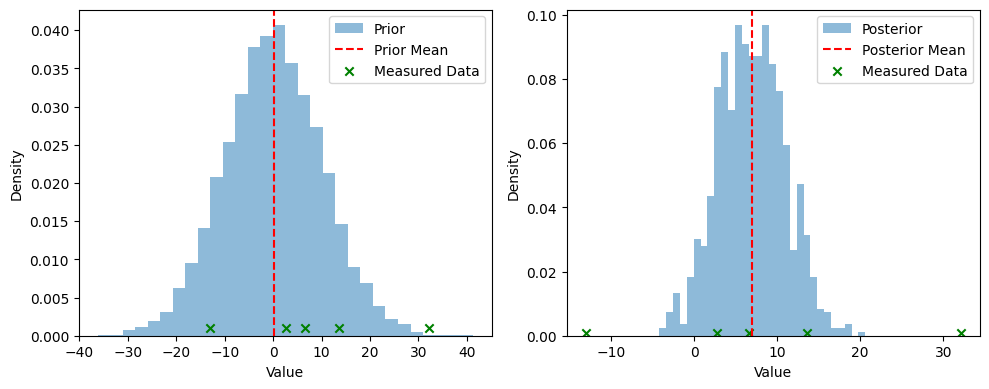

In [28]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt

# 측정 데이터
#data = torch.tensor([10, 15, 20])
data = dist.Normal(0, 10).sample((5,))

def model(data):
    # 사전 분포 (정규 분포)
    prior_mean = pyro.sample('prior_mean', dist.Normal(0, 10))
    prior_std = pyro.sample('prior_std', dist.Normal(10, 0.1))
    
    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)
    
    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)

# 결과 출력
print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

# 사전 분포와 사후 분포 시각화
plt.figure(figsize=(10, 4))

# 사전 분포
plt.subplot(1, 2, 1)
prior_samples = dist.Normal(0, 10).sample((10000,))
plt.hist(prior_samples.numpy(), bins=30, density=True, alpha=0.5, label='Prior')
plt.axvline(x=prior_samples.mean(), color='r', linestyle='--', label='Prior Mean')  # 사전 평균
plt.scatter(data, [0.001] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# 사후 분포
plt.subplot(1, 2, 2)
plt.hist(posterior_mean, bins=30, density=True, alpha=0.5, label='Posterior')
plt.axvline(x=posterior_mean.mean(), color='r', linestyle='--', label='Posterior Mean')  # 사후 평균
plt.scatter(data, [0.001] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()
